# Exam Mark Prediction 

**Problem Statement:**
We have provided  amount of study student are doing everyday in `hours`  , `age` of student and Availablity of `Internet`. with help of this we have to predict student `marks` ? 



# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Collect Data

In [2]:
data = pd.read_csv("Dataset.csv")
data.head()

,hours,age,internet,marks
0,6.83,15,1,78.50
1,6.56,16,0,76.74
2,NaN,17,1,78.68
3,5.67,18,0,71.82
4,8.67,19,1,84.19


# Data Preprocessing


In [3]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hours     196 non-null    float64
 1   age       201 non-null    int64  
 2   internet  201 non-null    int64  
 3   marks     201 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [4]:
# Describe Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hours,196.0,6.981429,1.266266,4.15,5.7575,7.11,8.0825,8.99
age,201.0,17.467662,1.720523,15.00,16.0000,17.00,19.0000,20.00
internet,201.0,0.552239,0.498505,0.00,0.0000,1.00,1.0000,1.00
marks,201.0,77.951244,4.919626,68.57,73.4000,77.77,82.3000,86.99


In [5]:
# Checking Shape
data.shape

(201, 4)

We have 201 rows and 4 columns

In [6]:
# Checks for datatypes
data.dtypes

hours       float64
age           int64
internet      int64
marks       float64
dtype: object

All data in Numeric format so there is no need to datatype conversion

In [7]:
# Check for missing value
data.isna().sum()

hours       5
age         0
internet    0
marks       0
dtype: int64

In [8]:
# Fill missing value for Hours with median of hours data
data["hours"].fillna(np.mean(data.hours),inplace=True)
data.isna().sum()

hours       0
age         0
internet    0
marks       0
dtype: int64

Text(0, 0.5, 'Marks')

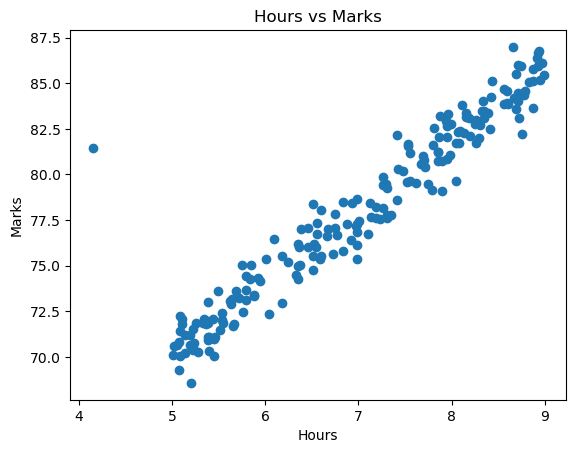

In [9]:
plt.scatter(data.hours,data.marks)
plt.title("Hours vs Marks")
plt.xlabel("Hours")
plt.ylabel("Marks")


From this plot we can notice that as `hours` increase `marks` increase, This means hours and mark directly proportional to each other. 

In [10]:
data.age.value_counts()

15    35
16    34
17    33
18    33
19    33
20    33
Name: age, dtype: int64

In [11]:
data.internet.value_counts()

1    111
0     90
Name: internet, dtype: int64

In [12]:
data.corr()

,hours,age,internet,marks
hours,1.000000,-0.055314,0.009683,0.956744
age,-0.055314,1.000000,-0.028626,-0.060712
internet,0.009683,-0.028626,1.000000,0.005080
marks,0.956744,-0.060712,0.005080,1.000000


<AxesSubplot:>

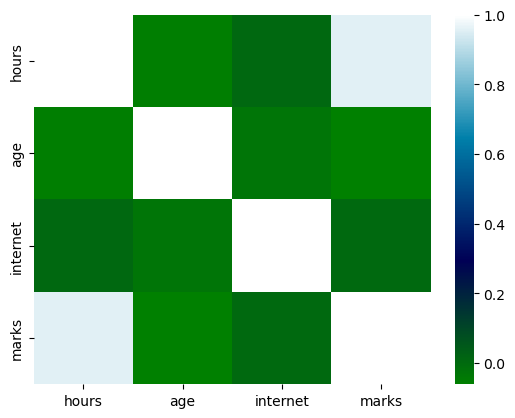

In [13]:
sns.heatmap(data.corr(),cmap="ocean")

# Split data into x and y

In [14]:
x = data.drop("marks",axis=1)
x

,hours,age,internet
0,6.830000,15,1
1,6.560000,16,0
2,6.981429,17,1
3,5.670000,18,0
4,8.670000,19,1
...,...,...,...
196,8.560000,19,1
197,8.940000,20,1
198,6.600000,15,1
199,8.350000,16,1


In [15]:
y = data["marks"]
y

0      78.50
1      76.74
2      78.68
3      71.82
4      84.19
       ...  
196    84.68
197    86.75
198    78.05
199    83.50
200    81.45
Name: marks, Length: 201, dtype: float64

## Splitting data into train and test set

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (41, 3), (160,), (41,))

We are giving 160 data to training set and 41 data to test our model

Here I'm going training two model:
* model1 = without feature scaling
* model2 = with feature scaling
at last I'll compare this two.

In [18]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.96455830372766

In [19]:
x_train.head()

,hours,age,internet
53,5.52,20,1
124,8.69,19,1
196,8.56,19,1
58,5.39,19,1
156,8.39,15,1


# Feature Scaling


In [20]:
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [21]:
x_train.head()

,0,1,2
0,-1.192430,1.542837,0.848782
1,1.446694,0.940754,0.848782
2,1.338465,0.940754,0.848782
3,-1.300659,0.940754,0.848782
4,1.196935,-1.467577,0.848782


In [22]:
x_test.head()

,0,1,2
0,0.830621,1.542837,-1.178159
1,-0.168417,0.338672,-1.178159
2,0.597512,-0.865494,0.848782
3,1.504971,-1.467577,-1.178159
4,1.471670,0.940754,0.848782


In [23]:
np.random.seed(42)
model2 = LinearRegression()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9645583037276599

In [24]:
ypreds1 = model1.predict(x_test)
ypreds2 = model2.predict(x_test)

C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ypreds1)

24.525643037103798

In [26]:
mean_absolute_error(y_test,ypreds2)

0.8378278275694877

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test,ypreds1)

-18.77874534172554

In [28]:
r2_score(y_test,ypreds2)

0.9645583037276599

In [29]:
ypreds1

array([56.41791044, 52.78255697, 55.49412051, 59.15410096, 58.61947863,
       47.415617  , 53.3660875 , 59.08278941, 48.88130815, 49.79895168,
       52.22613931, 48.92799272, 57.68618616, 48.69509438, 51.67451465,
       51.52770655, 55.91100898, 56.47579668, 48.22254332, 49.44831949,
       47.7570089 , 47.69689903, 47.69689903, 54.28791605, 48.40457207,
       56.90414907, 50.16436257, 54.56501306, 47.98545996, 59.82345946,
       59.58354448, 56.96622032, 58.65975455, 59.25780151, 57.43790114,
       57.37164487, 59.02490318, 47.71254797, 58.99892282, 53.26570171,
       59.19573026])

In [30]:
ypreds2

array([81.4597924 , 77.13404643, 80.59659948, 84.84858813, 84.28932067,
       70.83173275, 78.06094013, 84.70160972, 72.50935932, 73.59115184,
       76.60992147, 72.73009505, 83.02407106, 72.2856875 , 75.86443664,
       75.60633436, 81.11778835, 81.57020422, 71.80097731, 73.10866569,
       71.24179775, 70.98449543, 70.98449543, 79.10687809, 72.06050368,
       82.31070473, 74.11296484, 79.29549533, 71.39242431, 85.63215155,
       85.26221337, 82.38526201, 84.39902044, 85.03560545, 82.72584197,
       82.68713924, 84.5911979 , 71.16795253, 84.66219495, 77.69393803,
       84.96104818])

In [31]:
np.array(y_test)

array([82.03, 77.82, 80.58, 82.21, 83.08, 72.08, 77.19, 84.35, 70.96,
       72.46, 76.63, 72.38, 83.48, 71.87, 74.97, 76.04, 79.17, 82.93,
       71.8 , 73.61, 71.5 , 71.22, 70.2 , 77.77, 71.1 , 83.82, 75.36,
       77.59, 71.18, 85.46, 86.12, 82.27, 85.48, 86.75, 82.79, 82.1 ,
       84.6 , 70.4 , 85.98, 76.38, 86.41])

In [32]:
PredMark = pd.DataFrame([np.array(y_test),ypreds1,ypreds2]).T
PredMark

,0,1,2
0,82.03,56.417910,81.459792
1,77.82,52.782557,77.134046
2,80.58,55.494121,80.596599
3,82.21,59.154101,84.848588
4,83.08,58.619479,84.289321
5,72.08,47.415617,70.831733
6,77.19,53.366087,78.060940
7,84.35,59.082789,84.701610
8,70.96,48.881308,72.509359
9,72.46,49.798952,73.591152


<AxesSubplot:>

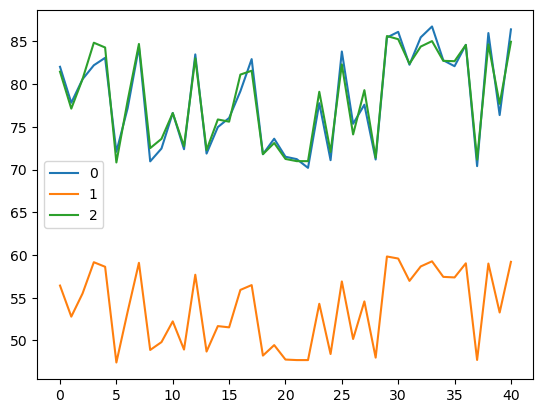

In [33]:
PredMark.plot()

## From Above we notice that, model2 predictiong accurate result.
This mean Feature scaling important step before training model.

# Making predction on own data

In [34]:
# let considet
hours = 4
age = 15
internet = 1
mark = model2.predict([[hours,age,internet]])
print(f"The student who is {age} year old, studing {hours} hours with Internet will get {mark}.")


The student who is 15 year old, studing 4 hours with Internet will get [93.87761838].


### Thanks for reading.